MÉTODOS DE EVALUACIÓN

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv('X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [14]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,random_state=10)

In [15]:
pd.DataFrame.equals(X_train,X2_train) #Los dataframes son iguales con el mismo random_state  

True

Cross validation

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [18]:
scores.mean()

0.44964021745791766

In [19]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.707617476172978

 SELECCION DE MODELOS
 Overfitting o UnderFitting?

In [20]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.0179925 , 0.11799574, 0.12699223, 0.13869548, 0.09702063]),
 'score_time': array([0.00899863, 0.00399971, 0.00500154, 0.00603342, 0.00404215]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [21]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

#Se tiene un underfitting y Lasso no funciona bien

0.7491178363039036
0.44964021745791766


VALIDATION CURVES

In [23]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(),X,y,return_train_score=True,cv=5)

{'fit_time': array([0.01999974, 0.010993  , 0.01200271, 0.01096511, 0.01099515]),
 'score_time': array([0.00903678, 0.00996947, 0.00995874, 0.01103473, 0.01204753]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

In [24]:
cross_validate(KNeighborsRegressor(n_neighbors=10),X,y,return_train_score=True,cv=5)

{'fit_time': array([0.02099347, 0.0120008 , 0.01296067, 0.012995  , 0.01101995]),
 'score_time': array([0.01103044, 0.01400375, 0.0130384 , 0.01301622, 0.01196027]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

In [26]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [28]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),X,y,param_name='n_neighbors',param_range=n,cv=5)

In [29]:
train_scores

array([[0.85254787, 0.87500249, 0.87361899, 0.87096664, 0.86944354],
       [0.76258234, 0.80362711, 0.80107876, 0.79649437, 0.79225826],
       [0.71882872, 0.77528919, 0.77290638, 0.76735431, 0.76232037],
       [0.68629696, 0.77062676, 0.76985196, 0.76407441, 0.75829891],
       [0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953],
       [0.66669119, 0.75639535, 0.75224453, 0.74815962, 0.74071023],
       [0.65480296, 0.74891959, 0.74648058, 0.74378262, 0.73531718],
       [0.64772202, 0.74008013, 0.73888781, 0.73626996, 0.72603174],
       [0.63936836, 0.73593265, 0.73519762, 0.73104469, 0.72255579],
       [0.63264888, 0.73410524, 0.73254544, 0.72913498, 0.72038171],
       [0.62426297, 0.73376047, 0.73130737, 0.72761135, 0.7192313 ],
       [0.61965019, 0.73181725, 0.72943231, 0.72617578, 0.71804593],
       [0.61578387, 0.72891082, 0.72651615, 0.72246403, 0.71505758],
       [0.6119936 , 0.72401826, 0.72211091, 0.718668  , 0.71028635],
       [0.60667711, 0.7208691 , 0.

In [31]:
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

([<matplotlib.axis.XTick at 0x1d97cf4ed08>,
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '10'),
  Text(5, 0, '12'),
  Text(6, 0, '14'),
  Text(7, 0, '16'),
  Text(8, 0, '18'),
  Text(9, 0, '20'),
  Text(10, 0, '22'),
  Text(11, 0, '24'),
  Text(12, 0, '26'),
  Text(13, 0, '28'),
  Text(14, 0, '30'),
  Text(15, 0, '32'),
  Text(16, 0, '34'),
  Text(17, 0, '36'),
  Text(18, 0, '38'),
  Text(19, 0, '40'),
  Text(20, 0, '42'),
  Text(21, 0, '44'),
  Text(22, 0, '46'),
  Text(23, 0, '48')])

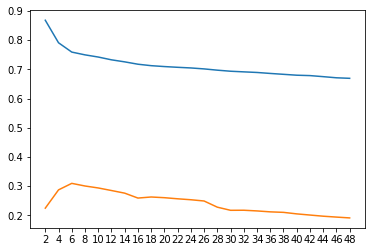

In [32]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n)

LEARNING CURVES

In [35]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)

#array1 Cantidad de datos con el que se entreno el modelo

samples,train,test = lc[0], lc[1], lc[2]

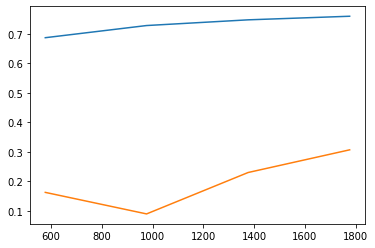

In [40]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])